In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import feature_selection
from sklearn import tree
from sklearn import utils
from sklearn import naive_bayes
from sklearn import feature_selection
from sklearn import ensemble
from sklearn import linear_model
from sklearn import neighbors
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import re


In [3]:
cd Desktop/Globsyn/dataset/

C:\Users\Pravash Ranjan\Desktop\Globsyn\dataset


In [4]:
df=pd.read_csv("Interview.csv")
df.drop(["Unnamed: 23","Unnamed: 24","Unnamed: 25","Unnamed: 26","Unnamed: 27"],axis=1,inplace=True)
df.columns=["date","client","industry","location","position","skills","inter_type","ID","gender","curr_location","job_location",
           "venue","native_location","permission","hope","three_hours","alt_number","resume","clear_about_venue","letter","expected",
           "observed","married"]
df.date=df.date.str.replace(" ","")
df.date=df.date.str.replace(r'\d\d\d\d&\d\d\.\d\d\w\w',"2016")
df.date=df.date=df.date.str.replace("/",".")
df.date=df.date.str.replace(r'\WApr\W',".04.")
df.date=df.date.str.replace('Apr',".04.")
df.date=df.date.str.replace(r'\d\d\d\d&\d\.\d\d\w\w',"2016")
df.date=df.date.str.replace('-',".")
df.date=df.date.str.replace(r'\W16',".2016")
df.date=df.date.str.replace(r'\W15',".2015")
df.drop(df[df.date.isnull()].index,inplace=True)
import datetime
def conv(s):
    ar=str(s).split(".")
    try:
        d=datetime.date(int(ar[2]),int(ar[1]),int(ar[0]))
    except Exception:
        print(len(ar),s)
    return (d)
df["new_date"]=df.date.apply(conv)
df["new_date"]=pd.to_datetime(df.new_date)
df.drop(df[df.expected.isnull()].index,inplace=True)
df.drop("date",axis=1,inplace=True)
df.client.replace({"Standard Chartered Bank Chennai":"Standard Chartered Bank","Aon hewitt Gurgaon":"Aon Hewitt","Hewitt":"Aon Hewitt"},inplace=True)
df.industry.replace({"IT Products and Services":"IT","IT Services":"IT"},inplace=True)
df.location.replace({"CHENNAI":"Chennai","chennai":"Chennai","Gurgaonr":"Gurgaon","- Cochin- ":"Cochin","chennai ":"Chennai"},inplace=True)
df=df[df.new_date<'2019-01-01']
df.drop(df[(df.hope.isnull()) & (df.three_hours.isnull()) & (df.alt_number.isnull()) & (df.resume.isnull()) & (df.clear_about_venue.isnull())& (df.letter.isnull())].index,inplace=True)
df.observed.replace({"yes":"Yes","yes ":"Yes","no":"No","No ":"No","NO":"No","no ":"No"},inplace=True)
df.expected.replace({"yes":"Yes","11:00 AM":"Yes","10.30 Am":"Yes"},inplace=True)
df.letter.replace({"Havent Checked":"No","Need To Check":"No","Not sure":"No","Yet to Check":"No","Not Sure":"No","Not yet":"No",
                  "no":"No","na":"No","yes":"Yes","Na":"No"},inplace=True)
df.clear_about_venue.replace({"No- I need to check":"No","na":"No","yes":"Yes","Na":"No","no":"No"},inplace=True)
df.resume.replace({"No- will take it soon":"No","Not yet":"No","na":"No","yes":"Yes","Na":"No","Not Yet":"No"},inplace=True)
df.alt_number.replace({"No I have only thi number":"No","na":"No","yes":"Yes","Na":"No"},inplace=True)
df.three_hours.replace({"No Dont":"No","Na":"No","yes":"Yes"},inplace=True)
df.hope.replace({"Na":"No","yes":"Yes","Not Sure":"No","cant Say":"No","Not sure":"No"},inplace=True)
df.permission.replace({"Not yet":"No","Yet to confirm":"No","yes":"Yes","Na":"No"},inplace=True)
for i,s in df.iterrows():
    if (df["expected"][i]=="Uncertain"):
        df["expected"][i]=df["observed"][i]
df.permission.replace({"Yes":1,"No":0},inplace=True)
df.hope.replace({"Yes":1,"No":0},inplace=True)
df.three_hours.replace({"Yes":1,"No":0},inplace=True)
df.alt_number.replace({"Yes":1,"No":0},inplace=True)
df.resume.replace({"Yes":1,"No":0},inplace=True)
df.clear_about_venue.replace({"Yes":1,"No":0},inplace=True)
df.letter.replace({"Yes":1,"No":0},inplace=True)
df.expected.replace({"Yes":1,"No":0},inplace=True)
df.observed.replace({"Yes":1,"No":0},inplace=True)
df.married.replace({"Married":1,"Single":0},inplace=True)
df.drop(df[(df.permission.isnull()) | (df.hope.isnull()) | (df.three_hours.isnull()) | 
         (df.alt_number.isnull()) | (df.resume.isnull()) | (df.clear_about_venue.isnull()) |
        (df.letter.isnull()) | (df.expected.isnull()) | (df.observed.isnull())].index,inplace=True)
df.inter_type.replace({"Scheduled Walkin":"Scheduled","Scheduled ":"Scheduled","Scheduled Walk In":"Scheduled","Walkin ":"Walkin"},inplace=True)


In [59]:
df1=df.copy(deep=True)
df2=df.copy(deep=True)
df3=df.copy(deep=True)
df4=df.copy(deep=True)

In [6]:
X=df.drop(["skills","ID","native_location","new_date"],axis=1)
X.curr_location.replace({"chennai":"Chennai","chennai ":"Chennai","CHENNAI":"Chennai","- Cochin- ":"Cochin"},inplace=True)
X.job_location.replace({"- Cochin- ":"Cochin"},inplace=True)
X.venue.replace({"- Cochin- ":"Cochin"},inplace=True)
y=X.observed
X.drop("observed",axis=1,inplace=True)
X.head()

,client,industry,location,position,inter_type,gender,curr_location,job_location,venue,permission,hope,three_hours,alt_number,resume,clear_about_venue,letter,expected,married
0,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Scheduled,Male,Chennai,Hosur,Hosur,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0
1,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Scheduled,Male,Chennai,Bangalore,Hosur,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0
3,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Scheduled,Male,Chennai,Chennai,Hosur,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0,0
4,Hospira,Pharmaceuticals,Chennai,Production- Sterile,Scheduled,Male,Chennai,Bangalore,Hosur,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0,1
5,Aon Hewitt,IT,Gurgaon,Selenium testing,Scheduled,Male,Gurgaon,Gurgaon,Gurgaon,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0


In [7]:
def encode(X,cols):
    for i in cols:
        enc=LabelEncoder()
        enc.fit(X[i])
        X[i]=enc.transform(X[i])
    return X


In [8]:
X=encode(X,["industry","location","position","inter_type","gender","curr_location","job_location","venue"])
X.head()

,client,industry,location,position,inter_type,gender,curr_location,job_location,venue,permission,hope,three_hours,alt_number,resume,clear_about_venue,letter,expected,married
0,Hospira,3,1,3,0,1,1,4,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0
1,Hospira,3,1,3,0,1,1,0,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0
3,Hospira,3,1,3,0,1,1,1,4,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0,0
4,Hospira,3,1,3,0,1,1,0,4,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0,1
5,Aon Hewitt,2,4,5,0,1,4,3,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,0


In [9]:
X=encode(X,["client"])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1231
Data columns (total 18 columns):
client               981 non-null int32
industry             981 non-null int32
location             981 non-null int32
position             981 non-null int32
inter_type           981 non-null int32
gender               981 non-null int32
curr_location        981 non-null int32
job_location         981 non-null int32
venue                981 non-null int32
permission           981 non-null float64
hope                 981 non-null float64
three_hours          981 non-null float64
alt_number           981 non-null float64
resume               981 non-null float64
clear_about_venue    981 non-null float64
letter               981 non-null float64
expected             981 non-null int64
married              981 non-null int64
dtypes: float64(7), int32(9), int64(2)
memory usage: 111.1 KB


In [10]:
def Dtree(X,y):
    np.random.seed(42)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,random_state=42)
    dtree=tree.DecisionTreeClassifier()
    param = {'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]}
    n_folds=5
    gs=GridSearchCV(estimator=dtree,param_grid=param,cv=n_folds,scoring="precision")
    gs.fit(X_train,y_train)
    scores=pd.DataFrame(gs.cv_results_)
    plt.figure()
    plt.plot(scores["param_min_samples_split"], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_min_samples_split"], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel("min_samples_split")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    print(gs.best_estimator_)
    #return  


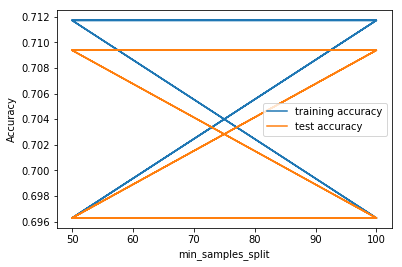

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [11]:
Dtree(X,y)

In [19]:
def Dclassify(X,y):
    np.random.seed(42)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,random_state=42)
    dt=tree.DecisionTreeClassifier()
    dt.fit(X_train,y_train)
    print("Training precision :",metrics.precision_score(y_train,dt.predict(X_train)))
    print("Test precision :",metrics.precision_score(y_test,dt.predict(X_test)))
    
    

In [20]:
Dclassify(X,y)

Training precision : 0.7736625514403292
Test precision : 0.7073170731707317


In [21]:
def get_f(X,y):
    np.random.seed(42)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,random_state=42)
    tr_=[]
    ts_=[]
    dt=tree.DecisionTreeClassifier()
    for i in range(1,19):
        rfecv=feature_selection.RFECV(estimator=dt,min_features_to_select=i,cv=5,scoring="precision")
        #print(X_train.shape,y_train.shape)
        rfecv.fit(X_train,y_train)
        X_1=X[X_train.columns[rfecv.get_support()]]
        X_2=X[X_test.columns[rfecv.get_support()]]
        #print(X_train.shape,y_train.shape)
        rfecv.fit(X_train,y_train)
        tr_.append(metrics.precision_score(y_train,rfecv.predict(X_train)))
        ts_.append(metrics.precision_score(y_test,rfecv.predict(X_test)))
        
    return tr_,ts_
    
    
        
    

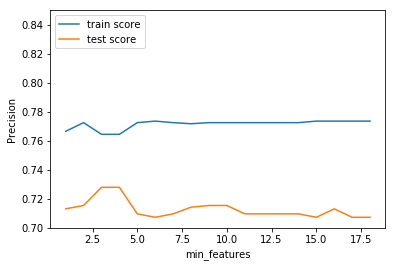

In [22]:
a,b=get_f(X,y)
plt.figure()
plt.plot(np.arange(1,19),a)
plt.plot(np.arange(1,19),b)
plt.xlabel("min_features")
plt.ylabel("Precision")
plt.legend(['train score', 'test score'], loc='upper left')
plt.ylim(.7,.85)
plt.show()


In [16]:
np.random.seed(42)
dt=tree.DecisionTreeClassifier()
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,random_state=42)
rfecv=feature_selection.RFECV(estimator=dt,min_features_to_select=3,cv=5,scoring="precision")
#print(X_train.shape,y_train.shape)
rfecv.fit(X_train,y_train)
X_1=X[X_train.columns[rfecv.get_support()]]
X_2=X[X_test.columns[rfecv.get_support()]]
#print(X_train.shape,y_train.shape)
rfecv.fit(X_train,y_train)
print(metrics.precision_score(y_train,rfecv.predict(X_train)))
print(metrics.precision_score(y_test,rfecv.predict(X_test)))

0.7645466847090663
0.728


In [24]:
df1[df1.observed==0].shape

(308, 23)

In [28]:
distributed=df1.copy(deep=True)
c_0,c_1=0,0
for idx,ser in df1.iterrows():
    if(ser.observed==1):
        if(c_1 < 150):
            c_1+=1
        else:
            distributed.drop(idx,inplace=True)
    else:
        if(c_0 < 150):
            c_0+=1
        else:
            distributed.drop(idx,inplace=True)      
        

In [29]:
print(df1.shape,distributed.shape)

(981, 23) (300, 23)


In [30]:
df1.drop(distributed.index,inplace=True)
print(df1.shape)

(681, 23)


In [52]:
def response(X,cols):    
    for i in cols:
        cl=X[i].unique()
        cl_cnt=dict()
        cl_cnt_pos=dict()
        cl_cnt_neg=dict()
        for j in cl:
            cl_cnt[j]=X[X[i]==j].shape[0]
            cl_cnt_pos[j]=X[(X[i]==j) & (X.observed==1)].shape[0]
            cl_cnt_neg[j]=X[(X[i]==j) & (X.observed==0)].shape[0]
        s=pd.Series(np.zeros((X.shape[0])))
        st=str(i)+"_new"
        X[st]=s
        for index,series in X.iterrows():
            if(series.observed==1):
                X[st][index]=cl_cnt_pos[series[i]]/cl_cnt[series[i]]
            else:
                X[st][index]=cl_cnt_neg[series[i]]/cl_cnt[series[i]]
    return X


In [53]:
sample=response(distributed,["client"])
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 669
Data columns (total 32 columns):
client               300 non-null object
industry             300 non-null object
location             300 non-null object
position             300 non-null object
skills               300 non-null object
inter_type           300 non-null object
ID                   300 non-null object
gender               300 non-null object
curr_location        300 non-null object
job_location         300 non-null object
venue                300 non-null object
native_location      300 non-null object
permission           300 non-null float64
hope                 300 non-null float64
three_hours          300 non-null float64
alt_number           300 non-null float64
resume               300 non-null float64
clear_about_venue    300 non-null float64
letter               300 non-null float64
expected             300 non-null int64
observed             300 non-null int64
married              300 non-

In [54]:
X_notun=sample[["client_new","expected"]]
y_notun=sample.observed
np.random.seed(42)
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,random_state=42)
dt=tree.DecisionTreeClassifier()
dt.fit(X_notun,y_notun)
print("Training precision :",metrics.precision_score(y_notun,dt.predict(X_notun)))
print("Test precision :",metrics.precision_score(distributed.observed,dt.predict(X_test)))
    


Training precision : 1.0


In [61]:
dum_cl=pd.get_dummies(df2.client,prefix="cl",drop_first=True)
dum_ind=pd.get_dummies(df2.industry,prefix="ind",drop_first=True)
dum_jbl=pd.get_dummies(df2.job_location,prefix="jbl",drop_first=True)
#dum_loc=pd.get_dummies(df2.location,prefix="loc",drop_first=True)
dum_pos=pd.get_dummies(df2.position,prefix="pos",drop_first=True)
#dum_skills=pd.get_dummies(df2.skills,prefix="skills",drop_first=True)
dum_int_type=pd.get_dummies(df2.inter_type,prefix="int_type",drop_first=True)
dum_gender=pd.get_dummies(df2.gender,prefix="gender",drop_first=True)
#dum_curr=pd.get_dummies(df2.curr_location,prefix="curr",drop_first=True)
dum_venue=pd.get_dummies(df2.venue,prefix="venue",drop_first=True)


In [62]:
df2=pd.concat([df2,dum_cl,dum_gender,dum_ind,dum_int_type,dum_jbl,dum_pos,dum_venue],axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1231
Data columns (total 67 columns):
client                        981 non-null object
industry                      981 non-null object
location                      981 non-null object
position                      981 non-null object
skills                        981 non-null object
inter_type                    981 non-null object
ID                            981 non-null object
gender                        981 non-null object
curr_location                 981 non-null object
job_location                  981 non-null object
venue                         981 non-null object
native_location               981 non-null object
permission                    981 non-null float64
hope                          981 non-null float64
three_hours                   981 non-null float64
alt_number                    981 non-null float64
resume                        981 non-null float64
clear_about_venue             981 non-n

client_new                    981 non-null float64

industry_new                  981 non-null float64

location_new                  981 non-null float64

position_new                  981 non-null float64

inter_type_new                981 non-null float64

gender_new                    981 non-null float64

curr_location_new             981 non-null float64

job_location_new              981 non-null float64

venue_new

In [63]:
df2.drop(["client_new","industry_new","location_new","position_new","inter_type_new","gender_new","curr_location_new","job_location_new","venue_new"],axis=1,inplace=True)

In [64]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1231
Data columns (total 58 columns):
client                        981 non-null object
industry                      981 non-null object
location                      981 non-null object
position                      981 non-null object
skills                        981 non-null object
inter_type                    981 non-null object
ID                            981 non-null object
gender                        981 non-null object
curr_location                 981 non-null object
job_location                  981 non-null object
venue                         981 non-null object
native_location               981 non-null object
permission                    981 non-null float64
hope                          981 non-null float64
three_hours                   981 non-null float64
alt_number                    981 non-null float64
resume                        981 non-null float64
clear_about_venue             981 non-n

In [77]:
def rfecv(df2,i):
    X=df2.drop("observed",axis=1)
    y=df2.observed
    model=tree.DecisionTreeClassifier()
    rfecv=feature_selection.RFECV(estimator=model,min_features_to_select=i,cv=5,scoring="precision")
    rfecv.fit(X,y)
    cols=X.columns[rfecv.get_support()]
    X_=X[cols]
    rfecv.fit(X_,y)
    print("Precision for train with ",len(cols),"features",metrics.precision_score(y,rfecv.predict(X_)))
    #print("Precision for test with ",len(cols),"features",metrics.precision_score(y_test,rfecv.predict(X_t)))
    print(cols)
    return cols
    

In [67]:
df2.drop(["client","industry","location","position","inter_type","gender","curr_location","job_location","venue","native_location"],axis=1,inplace=True)

In [71]:
df2.drop("new_date",axis=1,inplace=True)

In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1231
Data columns (total 45 columns):
permission                    981 non-null float64
hope                          981 non-null float64
three_hours                   981 non-null float64
alt_number                    981 non-null float64
resume                        981 non-null float64
clear_about_venue             981 non-null float64
letter                        981 non-null float64
expected                      981 non-null int64
observed                      981 non-null int64
married                       981 non-null int64
cl_Aon Hewitt                 981 non-null uint8
cl_Astrazeneca                981 non-null uint8
cl_Barclays                   981 non-null uint8
cl_Flextronics                981 non-null uint8
cl_Hospira                    981 non-null uint8
cl_Pfizer                     981 non-null uint8
cl_Prodapt                    981 non-null uint8
cl_Standard Chartered Bank    981 non-null uint

In [91]:
cols=rfecv(df2,10)

Precision for train with  15 features 0.758266818700114
Index(['letter', 'expected', 'married', 'cl_Aon Hewitt', 'cl_Prodapt',
       'cl_Standard Chartered Bank', 'gender_Male', 'ind_IT',
       'int_type_Walkin', 'pos_Niche', 'pos_Production- Sterile',
       'pos_Routine', 'pos_Trade Finance', 'venue_Bangalore', 'venue_Chennai'],
      dtype='object')


In [89]:
def modelstats1(Xtrain,Xtest,ytrain,ytest):
    np.random.seed(42)
    stats=[]
    modelnames=["LR","DecisionTree","KNN","NB"]
    models=list()
    models.append(linear_model.LogisticRegression(C=10))
    models.append(tree.DecisionTreeClassifier())
    models.append(neighbors.KNeighborsClassifier())
    models.append(naive_bayes.GaussianNB())
    for name,model in zip(modelnames,models):
        if name=="KNN":
            k=[l for l in range(5,17,2)]
            grid={"n_neighbors":k}
            grid_obj = GridSearchCV(estimator=model,param_grid=grid,scoring="f1")
            grid_fit =grid_obj.fit(Xtrain,ytrain)
            model = grid_fit.best_estimator_
            model.fit(Xtrain,ytrain)
            name=name+"("+str(grid_fit.best_params_["n_neighbors"])+")"
            print(grid_fit.best_params_)
        else:
            model.fit(Xtrain,ytrain)
        trainprediction=model.predict(Xtrain)
        testprediction=model.predict(Xtest)
        scores=list()
        scores.append(name+"-train")
        scores.append(metrics.accuracy_score(ytrain,trainprediction))
        scores.append(metrics.precision_score(ytrain,trainprediction))
        scores.append(metrics.recall_score(ytrain,trainprediction))
        scores.append(metrics.roc_auc_score(ytrain,trainprediction))
        stats.append(scores)
        scores=list()
        scores.append(name+"-test")
        scores.append(metrics.accuracy_score(ytest,testprediction))
        scores.append(metrics.precision_score(ytest,testprediction))
        scores.append(metrics.recall_score(ytest,testprediction))
        scores.append(metrics.roc_auc_score(ytest,testprediction))
        stats.append(scores)
    
    colnames=["MODELNAME","ACCURACY","PRECISION","RECALL","AUC"]
    return pd.DataFrame(stats,columns=colnames)

In [132]:
def trying2(X,y):
    np.random.seed(42)
    lr=LogisticRegression()
    rf=ensemble.RandomForestClassifier()
    dt=tree.DecisionTreeClassifier()
    train=[]
    test=[]
    loss=[]
    m=[rf]
    s=["Random Forest"]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)
    for j in range(0,len(m)):
        #print(s[j])
        model=m[j]
        for i in range(1,30):
            rfecv=feature_selection.RFE(estimator=model,n_features_to_select=i)
            rfecv.fit(X_train,y_train)
            cols=X.columns[rfecv.get_support()]
            X_=X_train[cols]
            X_t=X_test[cols]
            rfecv.fit(X_,y_train)
            
            #model.fit(X_,y)
            #print(cols)
            train.append(metrics.precision_score(y_train,rfecv.predict(X_)))
            test.append(metrics.precision_score(y_test,rfecv.predict(X_t)))
            loss.append(metrics.log_loss(y_test,rfecv.predict_proba(X_t)))
    return train,test,loss

In [ ]:
def trying(X,y):
    np.random.seed(42)
    lr=LogisticRegression()
    rf=ensemble.RandomForestClassifier()
    m=[rf,lr]
    s=["Random Forest","Logistic"]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)
    for j in range(0,len(m)):
        print(s[j])
        model=m[j]
        for i in range(1,X.shape[1]):
            rfecv=feature_selection.RFECV(estimator=model,min_features_to_select=i,cv=5,scoring="precision")
            rfecv.fit(X_train,y_train)
            cols=X.columns[rfecv.get_support()]
            X_=X_train[cols]
            X_t=X_test[cols]
            rfecv.fit(X_,y_train)
            
            #model.fit(X_,y)
            #print(cols)
            print("Precision for train with ",len(cols),"features",metrics.precision_score(y_train,rfecv.predict(X_)))
            print("Precision for test with ",len(cols),"features",metrics.precision_score(y_test,rfecv.predict(X_t)))
            print()

In [92]:
X=df2[cols]
y=df2.observed
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,random_state=42)
print(X_train.shape,X_test.shape)

(833, 15) (148, 15)


In [93]:
modelstats1(X_train,X_test,y_train,y_test)

{'n_neighbors': 9}


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.770708,0.756258,0.989655,0.629215
1,LR-test,0.743243,0.713178,0.989247,0.658260
2,DecisionTree-train,0.781513,0.770380,0.977586,0.654801
3,DecisionTree-test,0.743243,0.720000,0.967742,0.665689
4,KNN(9)-train,0.733493,0.759420,0.903448,0.623661
5,KNN(9)-test,0.729730,0.719008,0.935484,0.658651
6,NB-train,0.763505,0.754316,0.979310,0.624043
7,NB-test,0.736486,0.710938,0.978495,0.652884


In [101]:
dfn=df3.drop(["ID","skills","native_location","client_new","industry_new","location_new","position_new","inter_type_new",
              "gender_new","curr_location_new","job_location_new","venue_new","curr_location"],axis=1)
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1231
Data columns (total 19 columns):
client               981 non-null object
industry             981 non-null object
location             981 non-null object
position             981 non-null object
inter_type           981 non-null object
gender               981 non-null object
job_location         981 non-null object
venue                981 non-null object
permission           981 non-null float64
hope                 981 non-null float64
three_hours          981 non-null float64
alt_number           981 non-null float64
resume               981 non-null float64
clear_about_venue    981 non-null float64
letter               981 non-null float64
expected             981 non-null int64
observed             981 non-null int64
married              981 non-null int64
new_date             981 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(3), object(8)
memory usage: 153.3+ KB


In [102]:
dum_cl=pd.get_dummies(dfn.client,prefix="cl",drop_first=True)
dum_ind=pd.get_dummies(dfn.industry,prefix="ind",drop_first=True)
dum_loc=pd.get_dummies(dfn.location,prefix="loc",drop_first=True)
dum_jbl=pd.get_dummies(dfn.job_location,prefix="jbl",drop_first=True)
dum_pos=pd.get_dummies(dfn.position,prefix="pos",drop_first=True)
dum_int_type=pd.get_dummies(dfn.inter_type,prefix="int_type",drop_first=True)
dum_gender=pd.get_dummies(dfn.gender,prefix="gender",drop_first=True)
dum_venue=pd.get_dummies(dfn.venue,prefix="venue",drop_first=True)
dum_permission=pd.get_dummies(dfn.permission,prefix="per",drop_first=True)
dum_hope=pd.get_dummies(dfn.hope,prefix="hope",drop_first=True)
dum_three_hours=pd.get_dummies(dfn.three_hours,prefix="three",drop_first=True)
dum_alt=pd.get_dummies(dfn.alt_number,prefix="alt",drop_first=True)
dum_resume=pd.get_dummies(dfn.resume,prefix="venue",drop_first=True)
dum_clear=pd.get_dummies(dfn.clear_about_venue,prefix="clear",drop_first=True)
dum_letter=pd.get_dummies(dfn.letter,prefix="letter",drop_first=True)
dum_expected=pd.get_dummies(dfn.expected,prefix="expected",drop_first=True)

In [103]:
dfn=pd.concat([dum_alt,dum_cl,dum_clear,dum_curr,dum_expected,dum_gender,dum_hope,dum_ind,dum_int_type,dum_jbl,dum_letter,
              dum_loc,dum_permission,dum_pos,dum_resume,dum_three_hours,dum_venue],axis=1)
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1231
Data columns (total 58 columns):
alt_1.0                       981 non-null uint8
cl_Aon Hewitt                 981 non-null uint8
cl_Astrazeneca                981 non-null uint8
cl_Barclays                   981 non-null uint8
cl_Flextronics                981 non-null uint8
cl_Hospira                    981 non-null uint8
cl_Pfizer                     981 non-null uint8
cl_Prodapt                    981 non-null uint8
cl_Standard Chartered Bank    981 non-null uint8
cl_UST                        981 non-null uint8
cl_Williams Lea               981 non-null uint8
cl_Woori Bank                 981 non-null uint8
clear_1.0                     981 non-null uint8
curr_Bangalore                981 non-null uint8
curr_CHENNAI                  981 non-null uint8
curr_Chennai                  981 non-null uint8
curr_Delhi                    981 non-null uint8
curr_Gurgaon                  981 non-null uint8
curr_Hyderab

In [105]:
dfn=pd.concat([dfn,df3.observed],axis=1)
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 1231
Data columns (total 59 columns):
alt_1.0                       981 non-null uint8
cl_Aon Hewitt                 981 non-null uint8
cl_Astrazeneca                981 non-null uint8
cl_Barclays                   981 non-null uint8
cl_Flextronics                981 non-null uint8
cl_Hospira                    981 non-null uint8
cl_Pfizer                     981 non-null uint8
cl_Prodapt                    981 non-null uint8
cl_Standard Chartered Bank    981 non-null uint8
cl_UST                        981 non-null uint8
cl_Williams Lea               981 non-null uint8
cl_Woori Bank                 981 non-null uint8
clear_1.0                     981 non-null uint8
curr_Bangalore                981 non-null uint8
curr_CHENNAI                  981 non-null uint8
curr_Chennai                  981 non-null uint8
curr_Delhi                    981 non-null uint8
curr_Gurgaon                  981 non-null uint8
curr_Hyderab

In [110]:
cols=rfecv(dfn,15)

Precision for train with  15 features 0.7609699769053118
Index(['alt_1.0', 'cl_Aon Hewitt', 'cl_Prodapt', 'cl_Standard Chartered Bank',
       'curr_Bangalore', 'curr_CHENNAI', 'curr_chennai', 'expected_1',
       'gender_Male', 'ind_IT', 'int_type_Walkin', 'letter_1.0', 'pos_Niche',
       'pos_Production- Sterile', 'pos_Routine'],
      dtype='object')


In [111]:
X=dfn[cols]
y=dfn.observed
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,random_state=42)
modelstats1(X_train,X_test,y_train,y_test)

{'n_neighbors': 15}


C:\Users\Pravash Ranjan\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.771909,0.757256,0.989655,0.631191
1,LR-test,0.743243,0.713178,0.989247,0.658260
2,DecisionTree-train,0.777911,0.766532,0.979310,0.647758
3,DecisionTree-test,0.756757,0.728000,0.978495,0.680156
4,KNN(15)-train,0.751501,0.741268,0.987931,0.598709
5,KNN(15)-test,0.716216,0.688889,1.000000,0.618182
6,NB-train,0.757503,0.753351,0.968966,0.620846
7,NB-test,0.729730,0.708661,0.967742,0.647507


(0.7, 0.8)

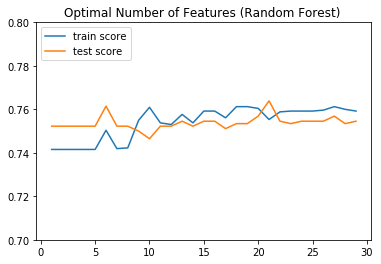

In [134]:
X=dfn[cols]
y=dfn.observed
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.15,random_state=42)
train,test,loss=trying2(X,y)
plt.figure()
plt.plot(np.arange(1,30,1),train)
plt.plot(np.arange(1,30,1),test)
plt.title("Optimal Number of Features (Random Forest) ")
plt.legend(['train score', 'test score'], loc='upper left')
plt.ylim(.7,.8)
